ML Workflow (Standard Flow):

1. Data Understanding (features, target, shape)

2. Exploratory Data Analysis (EDA) (visualization, distribution, skewness, outliers)

3. Preprocessing (missing values, encoding, scaling)

4. Train-Test Split (data alag karna → overfitting avoid karna)

5. Model Building

6. Evaluation (metrics, cross-validation)

7. Improvement (tuning, feature selection)

in this module we will use lirabries like numpy pandas seaborn and scikit learn

* Capping effect :

 when extreme values in a dataset are artificially limited to a maximum (or minimum) threshold. Any value beyond this threshold is recorded as the capped value.

#**Step 1 Data Understanding**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

In [ ]:
from sklearn import datasets

In [ ]:
california = datasets.fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [ ]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
df = pd.DataFrame(california.data, columns=california.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0000,6.9841,1.0238,322.0000,2.5556,37.8800,-122.2300
1,8.3014,21.0000,6.2381,0.9719,2401.0000,2.1098,37.8600,-122.2200
2,7.2574,52.0000,8.2881,1.0734,496.0000,2.8023,37.8500,-122.2400
3,5.6431,52.0000,5.8174,1.0731,558.0000,2.5479,37.8500,-122.2500
4,3.8462,52.0000,6.2819,1.0811,565.0000,2.1815,37.8500,-122.2500
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0000,5.0455,1.1333,845.0000,2.5606,39.4800,-121.0900
20636,2.5568,18.0000,6.1140,1.3158,356.0000,3.1228,39.4900,-121.2100
20637,1.7000,17.0000,5.2055,1.1201,1007.0000,2.3256,39.4300,-121.2200
20638,1.8672,18.0000,5.3295,1.1719,741.0000,2.1232,39.4300,-121.3200


In [ ]:
df.shape

(20640, 8)

**Features:**

Total 8 features → ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Target:

MedHouseValue (median house value in $100,000s)

Shape:

(20640, 8) → 20,640 data points, 8 features.

Meaning (short DS perspective):

Each row represents a California district with socio-economic + geographic features.

Target (house price) will be predicted from these features.

#**Step 2 EDA**



Exploratory Data Analysis used for :

1. Model selection : if a model is lenear then liner regression not then tree

2.  Preprocessing Decision:

  Highly skewed data → log transformation

  Outliers → remove / treat (boxplots help)

  Different scales → feature scaling (StandardScaler, MinMaxScaler)

Check ?

1. Distribution
2. Outliers
3. Relationships
4. Multicollinearity

Goal :

1. Data ki kahani samajhna → kis feature ka target pe kitna impact hai
2. Preprocessing aur Model ke liye roadmap banana



<Axes: ylabel='Count'>

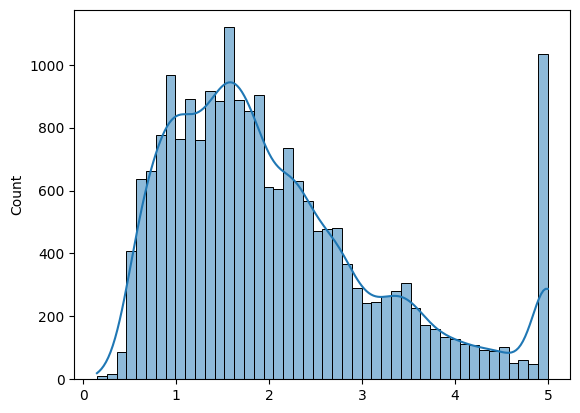

In [ ]:
sns.histplot(california.target,kde=True)

Observations :
Right skewd but theres at house values ~5 taht makes the data bimodal distribution of peaks

The main cluster lies around ~1 to ~3 which means most of houses are values in this range


<Axes: xlabel='MedInc'>

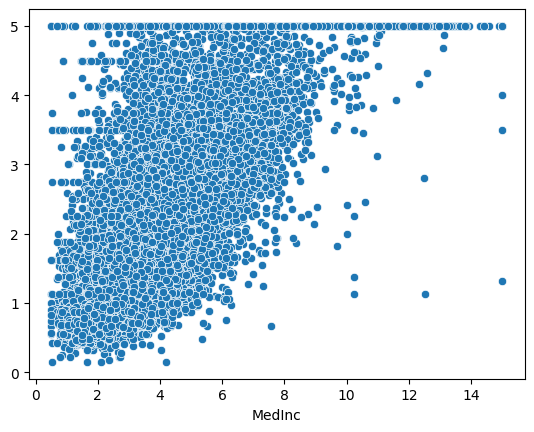

In [ ]:
sns.scatterplot(df,x="MedInc",y = california.target)

<Axes: xlabel='HouseAge'>

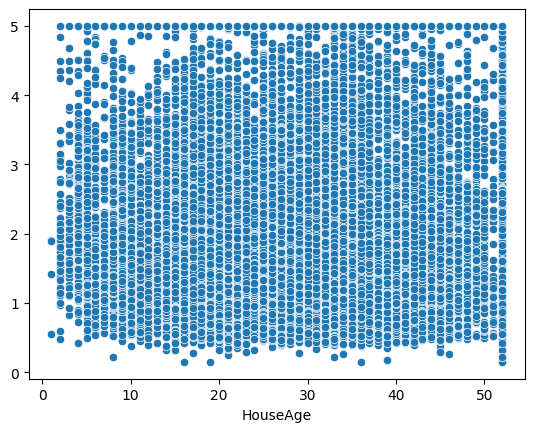

In [ ]:
sns.scatterplot(x=df["HouseAge"],y = california.target)

1. MedInc vs MedHouseValue
There is a strong positive correlation: higher median income generally leads to higher house prices.

  After a certain income level (~10), house prices stop increasing due to the capping effect (maximum value recorded as 500k).

  A few outliers exist in the 10–14 income range, but they are rare.

  MedInc is likely to be one of the strongest predictors for house price prediction.

2. HouseAge vs MedHouseValue
  There is no strong or clear correlation between house age and house prices.

  Houses below ~20 years of age tend to have relatively lower prices, whereas some older houses (40–50 years) are in expensive areas (possibly due to location).

  Capping effect is visible at both edges (older houses also capped at ~500k).

Overall, HouseAge is a weak predictor compared to MedInc.

<Axes: >

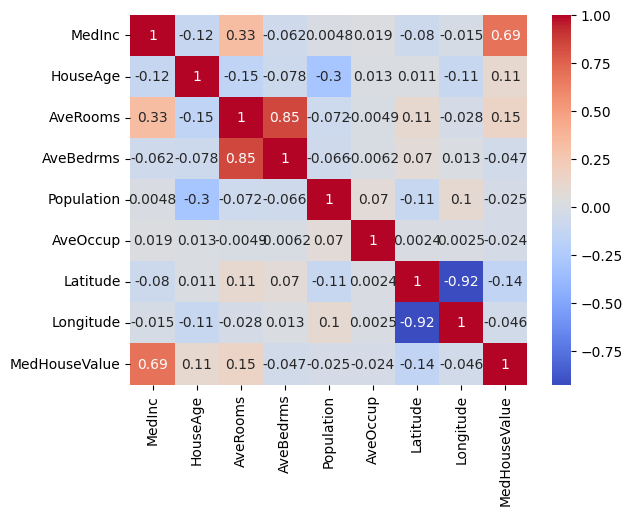

In [ ]:
df["MedHouseValue"] = california.target
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

 **Final Observations **

Strongest Correlation with Target (MedHouseValue):

MedInc (Median Income) → high positive correlation → most important predictor for house price.

Other Correlations with Target:

AveRooms → moderate positive correlation (bigger houses tend to be expensive).

HouseAge → weak positive correlation.

Latitude (negative) → expensive houses more towards specific regions (southern California).

Multicollinearity (Feature-Feature Correlation):

AveRooms & AveBedrms → highly correlated (can drop one for linear models to avoid multicollinearity).

#Step 3 Preprocessing



* Missing or inconsistent values → Model can’t handle NaN values directly.
* Different scales in features → Models like Linear Regression, SVM, KNN perform poorly if one feature dominates due to larger numerical range.
* Categorical features → Need to be converted into numbers (encoding).
* Outliers & skewness → Can bias the model if not handled.

**Steps in Preprocessing :**

1. Missing Values Handling

  Check using: df.isnull().sum()

  Fill or drop using SimpleImputer / Pandas.

2. Feature Scaling

 Needed when features have different ranges.

 StandardScaler → makes features mean=0, std=1 (good for Linear Regression, SVM, KNN).

 Tree-based models (Random Forest, Decision Tree) → scaling not strictly needed.

3. Encoding (if categorical)

  OneHotEncoder or LabelEncoder (not needed for California dataset as all features are numeric).

4. Train-Test Split

  Needed to evaluate model performance on unseen data.

  Usually 80% training, 20% testing.


In [ ]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseValue,0


obervation :
no missing values

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


1. Range Analysis
  MedInc (0.49 → 15) → moderate range, not extreme.

  HouseAge (1 → 52) → moderate, no severe outliers.

  AveRooms (0.8 → 141) → very large range due to extreme outliers.

  AveBedrms (0.3 → 34) → relatively large, but much smaller than AveRooms.

  Population (3 → 35682) → huge variation → needs scaling.

  AveOccup (0.69 → 1243) → very large range with extreme outliers.

  Latitude (32 → 42) & Longitude (-124 → -114) → small & consistent range, less scaling impact.

  MedHouseValue (Target) → capped at 5, we don’t scale target in supervised learning.

2. Scaling Decision
  Scaling is most needed for: Population, AveRooms, AveOccup (huge range + outliers).

  Optional/less critical for: MedInc, HouseAge, Latitude, Longitude.



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df.drop(columns=["MedHouseValue"]))
scaled_df= pd.DataFrame(scaled_data,columns = df.drop(columns=["MedHouseValue"]).columns)
scaled_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.3448,0.9821,0.6286,-0.1538,-0.9744,-0.0496,1.0525,-1.3278
1,2.3322,-0.6070,0.3270,-0.2633,0.8614,-0.0925,1.0432,-1.3228
2,1.7827,1.8562,1.1556,-0.0490,-0.8208,-0.0258,1.0385,-1.3328
3,0.9330,1.8562,0.1570,-0.0498,-0.7660,-0.0503,1.0385,-1.3378
4,-0.0129,1.8562,0.3447,-0.0329,-0.7598,-0.0856,1.0385,-1.3378
...,...,...,...,...,...,...,...,...
20635,-1.2161,-0.2892,-0.1550,0.0774,-0.5126,-0.0491,1.8016,-0.7588
20636,-0.6916,-0.8454,0.2769,0.4624,-0.9444,0.0050,1.8063,-0.8187
20637,-1.1426,-0.9249,-0.0903,0.0494,-0.3695,-0.0717,1.7782,-0.8237
20638,-1.0546,-0.8454,-0.0402,0.1588,-0.6044,-0.0912,1.7782,-0.8736


In [ ]:
pd.set_option("display.float_format", "{:.4f}".format)
scaled_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.7743,-2.1962,-1.8523,-1.6108,-1.2561,-0.2290,-1.4476,-2.3860
25%,-0.6881,-0.8454,-0.3994,-0.1912,-0.5638,-0.0617,-0.7968,-1.1132
50%,-0.1768,0.0286,-0.0808,-0.1011,-0.2291,-0.0243,-0.6423,0.5389
75%,0.4593,0.6643,0.2520,0.0060,0.2645,0.0204,0.9730,0.7785
max,5.8583,1.8562,55.1632,69.5717,30.2503,119.4191,2.9581,2.6253


obersvation :

Data is now normailzed where the mean is 0 and std is 1

#Step 4 Train Test Split (model evalution)

Train Test are the two major steps where we train and teast the data for the model to make prediction

Standard split: 80% training, 20% testing.

random_state → same split bar-bar repeatable ho.

syntax :

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_df , california.target , test_size=0.2, random_state=42)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

#Step 5 Model Building

Training :  Finding a relation ship between the x train and y train i.e feature and target

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.coef_            # Har feature ka coefficient (impact)

array([ 0.85238169,  0.12238224, -0.30511591,  0.37113188, -0.00229841,
       -0.03662363, -0.89663505, -0.86892682])

In [ ]:
model.feature_names_in_  # Corresponding feature names

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude'], dtype=object)

obersavtion :
medinc highest impacted coefficient

Latitude/Longitude = Important but inverse relationship


#Step 6 Evaluation

Model is trainned now lets see how does it performs on the untrained data , basically the testing data

we can do this with 3 matrics :

**R² – Coefficient of Determination**

Measures how much variance in target is explained by the model.

Range:

1.0 = Perfect prediction

~0 = Poor (random guess)

Negative = Worse than random

**MAE – Mean Absolute Error**

Average absolute difference between predicted & actual prices.

Lower = Better.

**RMSE – Root Mean Squared Error**

Similar to MAE but penalizes large errors more.

Lower = Better.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred=model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(r2, mae, rmse)

0.575787706032451 0.5332001304956565 0.7455813830127762


R² ≈ 0.57 – The model explains around 57% of the variance in house prices, which is acceptable for a baseline but indicates underfitting as a significant portion of variance remains unexplained.

MAE ≈ 0.53 – On average, the model’s predictions are off by about 0.53 (≈ $530 in 1000s unit), which is moderate but can be improved.

RMSE ≈ 0.74 – Higher than MAE, suggesting that the model makes larger errors on some predictions, likely due to outliers.

Overall – The Linear Regression model performs reasonably for a baseline but is not highly accurate, indicating the need for further improvements through feature engineering, outlier handling, or advanced models.

#Step 7 Improvement

decision tree model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

r2 = r2_score(y_test, y_pred_tree)
mae = mean_absolute_error(y_test, y_pred_tree)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(r2, mae, rmse)

0.6228111330554302 0.4537843265503876 0.7030445773467542


observation :

R² ≈ 0.62 – The Decision Tree explains ~62% of the variance in house prices, showing an improvement over Linear Regression (0.57).

MAE ≈ 0.45 – The average prediction error decreased compared to Linear Regression (~0.53), meaning more accurate predictions.

RMSE ≈ 0.70 – Slightly better than Linear Regression (0.74), but still indicates some large prediction errors, likely due to outliers or extreme values.

Overall – The model captures non-linear relationships better than Linear Regression but still has room for improvement.

Random Forest

Ensemble of Decision Trees – Builds multiple Decision Trees and averages their predictions → reduces overfitting.

Better Accuracy – Handles non-linear patterns and outliers better than a single Decision Tree.

Feature Importance – Helps identify which features are most important.

Default Hyperparameters work decently (unlike a single Decision Tree which easily overfits).

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [ ]:
r2= r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(r2, mae, rmse)

0.805024407701793 0.32761306601259704 0.5054678690929896


R² ≈ 0.80 – Random Forest explains ~80% of variance, a significant jump from Decision Tree & Linear Regression.

MAE ≈ 0.32 – Lowest error among all models (~$320 in 1000s unit).

RMSE ≈ 0.50 – Substantially reduced, showing better handling of large errors.

Overall – Random Forest is the best-performing model so far; it captures non-linear relationships and avoids overfitting due to averaging multiple trees.

| **Model**             | **R²**     | **MAE**    | **RMSE**   | **Observation**                                             |
| --------------------- | ---------- | ---------- | ---------- | ----------------------------------------------------------- |
| **Linear Regression** | 0.57       | 0.53       | 0.74       | Baseline – simple linear trends captured                    |
| **Decision Tree**     | 0.62       | 0.45       | 0.70       | Better non-linear capture, but prone to overfitting         |
| **Random Forest**     | **0.80** ✅ | **0.32** ✅ | **0.50** ✅ | Significantly better; generalizes well, reduced overfitting |
